In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import networkx as nx

In [12]:
import warrior as war

In [13]:
fcs = np.load('../local/fcs/mz_twins/fcs_100_mz.npy')
fcs.shape

(464, 100, 100)

In [14]:
N_SUBJECTS = fcs.shape[0]
NODES = fcs.shape[1]
EDGES = int((NODES*(NODES-1)) / 2)
EDGES

4950

In [15]:
THHRESHOLDS = np.array([0.05, 0.1, 0.15, 0.2, 0.25])
mean_densities = np.zeros(len(THHRESHOLDS))
connected_graphs = np.zeros(len(THHRESHOLDS))

In [16]:
for idx1, t in enumerate(THHRESHOLDS):
    print(f't={t}')
    sfcs = np.where(np.abs(fcs)>=t, fcs, 0)
    densities = np.zeros(sfcs.shape[0])
    connectedness = np.zeros(sfcs.shape[0])
    for idx2, A in enumerate(sfcs):
        v = war.brain.upper_vectorization(A)
        e = np.where(v!=0,1,0).sum()
        d = e / EDGES
        densities[idx2] = d
        #print(f'Min:{densities.min():.3f} \nMean:{densities.mean():.3f} \nMax:{densities.max():.3f}')
        
        G = nx.from_numpy_array(A)
        connectedness[idx2] = nx.is_connected(G)

    
        
    print(f' D: {densities.mean():.2f}')
    print(f' C: {int(connectedness.sum())}')
    file_name = f'../local/fcs/mz_twins/sparse_fcs_100_mz_t{str(t)}_{int(connectedness.sum())}.npy'
    print(file_name)
    np.save(file_name, sfcs)
    mean_densities[idx1] = densities.mean()
    connected_graphs[idx1] = connectedness.sum()

t=0.05
 D: 0.88
 C: 464
../local/fcs/mz_twins/sparse_fcs_100_mz_t0.05_464.npy
t=0.1
 D: 0.76
 C: 464
../local/fcs/mz_twins/sparse_fcs_100_mz_t0.1_464.npy
t=0.15
 D: 0.65
 C: 464
../local/fcs/mz_twins/sparse_fcs_100_mz_t0.15_464.npy
t=0.2
 D: 0.54
 C: 464
../local/fcs/mz_twins/sparse_fcs_100_mz_t0.2_464.npy
t=0.25
 D: 0.45
 C: 455
../local/fcs/mz_twins/sparse_fcs_100_mz_t0.25_455.npy


In [8]:
sfcs.shape

(464, 100, 100)

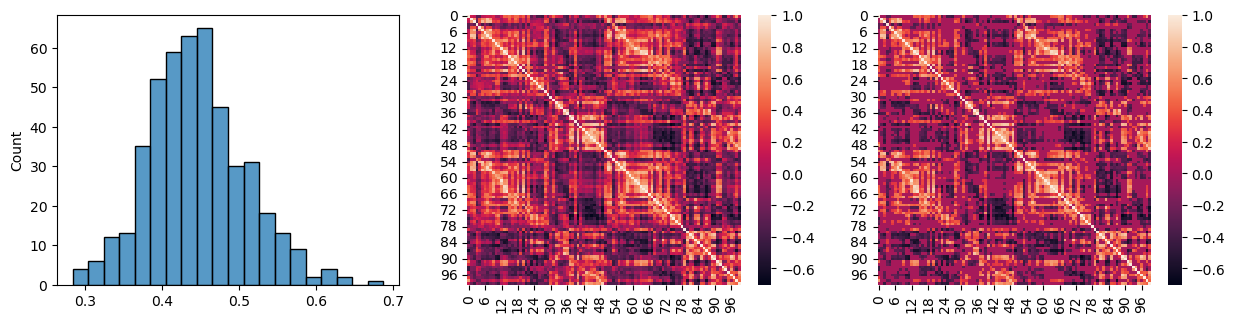

In [9]:
plt.figure(figsize=(15,3.5))
ax = plt.subplot(131)
sns.histplot(densities)
ax = plt.subplot(132)
sns.heatmap(fcs[0])
ax = plt.subplot(133)
sns.heatmap(sfcs[0])
plt.show()